[Nemo Code](https://realpython.com/python-opencv-color-spaces/)

In [110]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [111]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
def threeDplot(image,image_original, xlabel, ylabel, zlabel):
  x, y, z = cv.split(image)
  fig = plt.figure()
  axis = fig.add_subplot(1, 1, 1, projection="3d")
  pixel_colors = image_original.reshape((np.shape(image_original)[0]*np.shape(image_original)[1], 3))
  norm = colors.Normalize(vmin=-1.,vmax=1.)
  norm.autoscale(pixel_colors)
  pixel_colors = norm(pixel_colors).tolist()
  axis.scatter(x.flatten(), y.flatten(), z.flatten(), facecolors=pixel_colors, marker=".")
  axis.set_xlabel(xlabel)
  axis.set_ylabel(ylabel)
  axis.set_zlabel(zlabel)
  plt.show()

# Veamos a Nemo

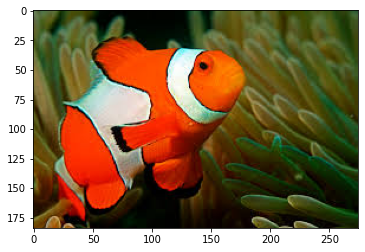

In [112]:
nemo_path = '/content/drive/Shareddrives/Imagenes/TP6 Grupo1/nemo0.jpg'
nemo_original = plt.imread(nemo_path);
plt.imshow(nemo_original);

Si quisieramos aislar a solo al pez, en el espacio de Color actual RGB deberiamos generar muchas mascaras que se ajusten a los diferentes colores que forman al pez. Se ve claramente que nosotros queremos separar el color naranja y blanco. La problematica que tiene decir esto es que tanto el naranja como el blanco tienen diferentes variantes. 

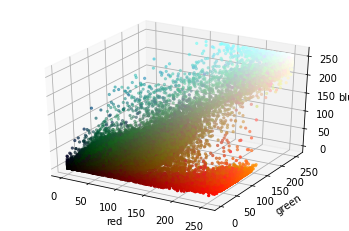

In [113]:
threeDplot(nemo_original, nemo_original, 'red', 'green', 'blue');

Podemos ver como los naranjas estan dispersos

# Conversión al espacio HSV
Para separar la información de color del brillo y de los diferentes matices transformamos la imagen desde el espacio RGB hacia el HSV.

In [114]:
nemo_hsv = cv.cvtColor(nemo_original, cv.COLOR_RGB2HSV)

Ahora observemos los canales H, S y V por separado

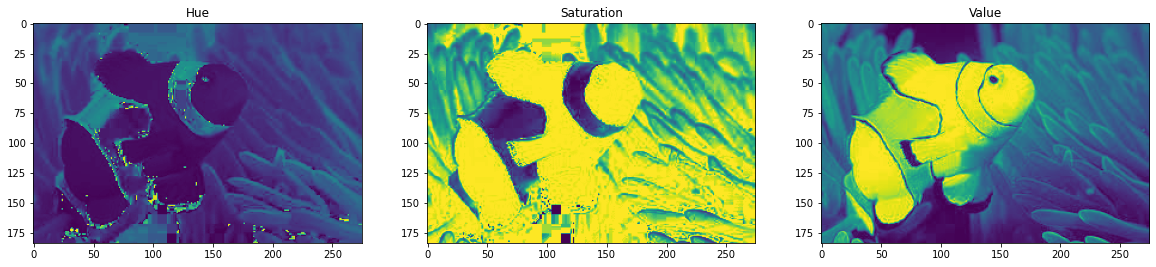

In [115]:
h, s, v = cv.split(nemo_hsv)
fig, ax = plt.subplots(1, 3, figsize=(20,20)) 
ax[0].set_title("Hue");ax[0].imshow(h);
ax[1].set_title("Saturation");ax[1].imshow(s);
ax[2].set_title("Value");ax[2].imshow(v);

Podemos ver, en la primera imagen, como en este nuevo esquema de color, todo el cuerpo de nemo comparte un "color" (hue) casi uniforme.
De esta forma ahora podemos crear una mascara que preserve ese rango de hue que nos interesa. 

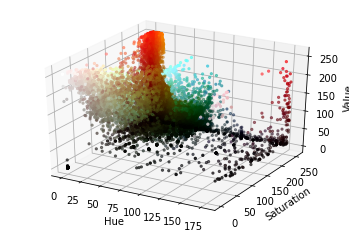

In [116]:
threeDplot(nemo_hsv,nemo_original, 'Hue', 'Saturation', 'Value')

Podemos ver como el naranja se encuentra concentrado en una zona bien definida y por lo tanto separable. 

Definimos las mascaras

In [117]:
light_orange = (1, 190, 200) 
dark_orange = (18, 255, 255)

In [118]:
orange_nemo_hsv_mask = cv.inRange(nemo_hsv, light_orange, dark_orange)

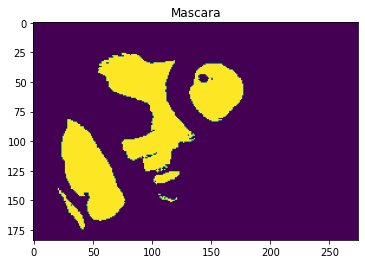

In [119]:
plt.title("Mascara")
plt.imshow(orange_nemo_hsv_mask);

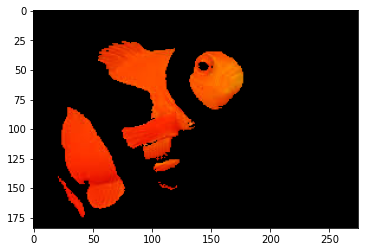

In [120]:
orange_nemo_RGB = cv.bitwise_and(nemo_original, nemo_original, mask=orange_nemo_hsv_mask)
plt.imshow(orange_nemo_RGB);

Ahora de forma similar para recuperar las parte blanca

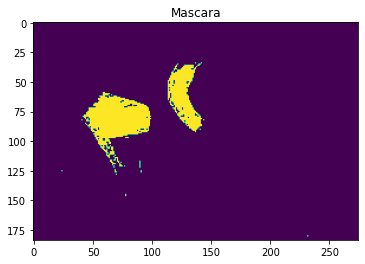

In [121]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)
white_nemo_hsv_mask = cv.inRange(nemo_hsv, light_white, dark_white)
plt.title("Mascara")
plt.imshow(white_nemo_hsv_mask);

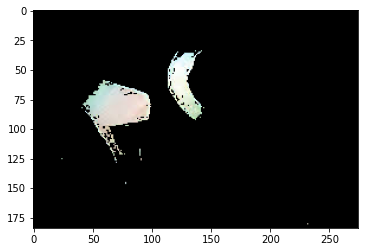

In [122]:
white_nemo_RGB = cv.bitwise_and(nemo_original, nemo_original, mask=white_nemo_hsv_mask)
plt.imshow(white_nemo_RGB);

Sumando ambas imagenes

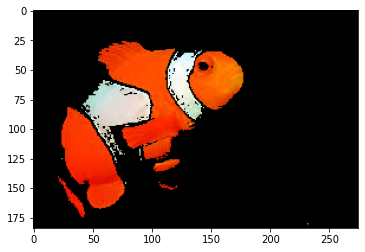

In [123]:
nemo_completo = cv.add(orange_nemo_RGB, white_nemo_RGB)
plt.imshow(nemo_completo);

## Prueba con Pájaro

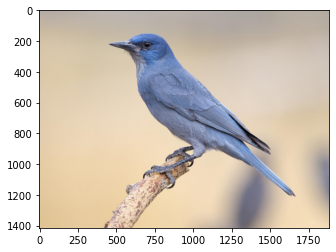

In [124]:
# Analogamente
bird_path = '/content/drive/Shareddrives/Imagenes/TP6 Grupo1/bird.jpg'
bird_original = plt.imread(bird_path)
plt.imshow(bird_original);

In [125]:
# Convertimos a HSV
bird_hsv = cv.cvtColor(bird_original, cv.COLOR_RGB2HSV) 

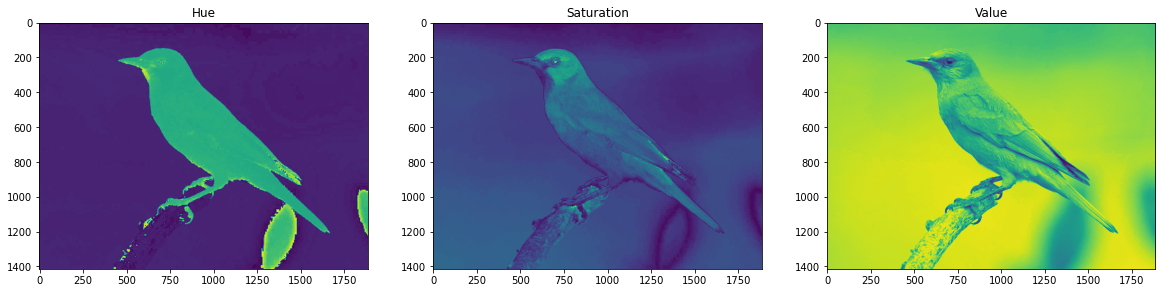

In [17]:
h, s, v = cv.split(bird_hsv)
fig, ax = plt.subplots(1, 3, figsize=(20,20)) 
ax[0].set_title("Hue");ax[0].imshow(h);
ax[1].set_title("Saturation");ax[1].imshow(s);
ax[2].set_title("Value");ax[2].imshow(v);

Podemos ver como claramente que hay un pequeño rango de valores de HUE que cubren a todo el pajarito

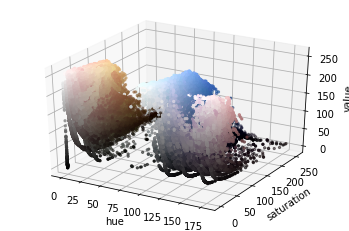

In [18]:
threeDplot(bird_hsv, bird_original, 'hue', 'saturation', 'value')

Fine tunning de la mascara

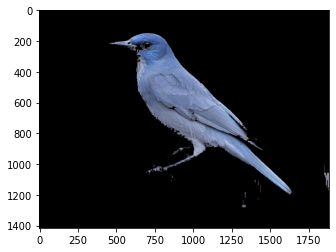

In [126]:
h_low = 78  #@param {type: "slider", min: 0, max: 255}
s_low = 0  #@param {type: "slider", min: 0, max: 255}
v_low = 0  #@param {type: "slider", min: 0, max: 255}

h_high = 118  #@param {type: "slider", min: 0, max: 255}
s_high = 255  #@param {type: "slider", min: 0, max: 255}
v_high = 255  #@param {type: "slider", min: 0, max: 255}


light_blue = (h_low, s_low, v_low)
dark_blue = (h_high, s_high, v_high)

bird_mask = cv.inRange(bird_hsv, light_blue, dark_blue)
bird_RGB = cv.bitwise_and(bird_original, bird_original, mask=bird_mask)
plt.imshow(bird_RGB);
plt.show()

Esa pequeño detalle de abajo pasa por la mascara dado que comparte intervalo de HUE con el pájaro como se puede apreciar en la imagen donde se muestra solo el  HUE 

## Niña con la Rosa

In [20]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

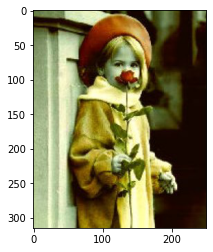

In [21]:
girl_path = '/content/drive/Shareddrives/Imagenes/TP6 Grupo1/Girl_and_rose.jpg'
girl_original = plt.imread(girl_path)
plt.imshow(girl_original);

Descomponemos la imagen en HSV

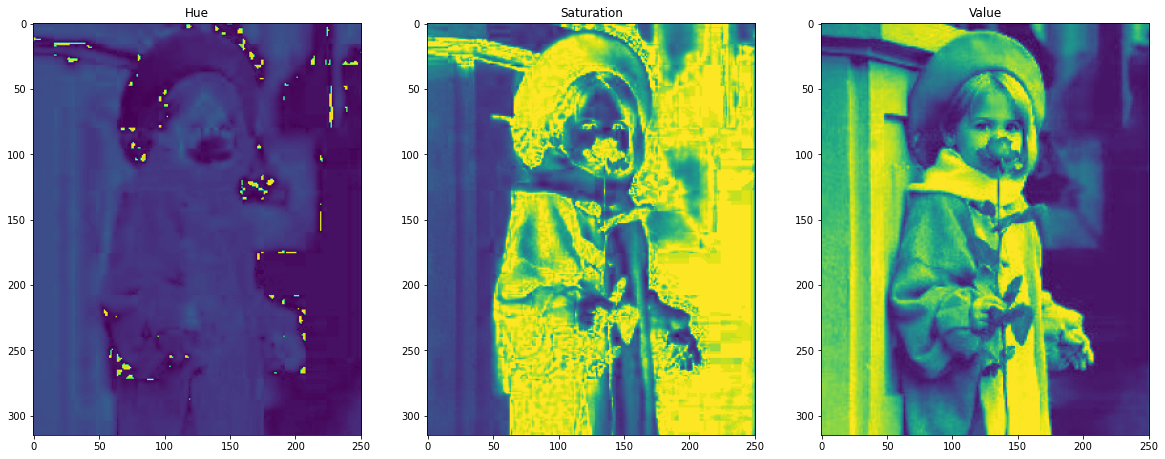

In [22]:
# Convertimos a HSV
girl_hsv = cv.cvtColor(girl_original, cv.COLOR_RGB2HSV) 
h, s, v = cv.split(girl_hsv)
fig, ax = plt.subplots(1, 3, figsize=(20,20)) 
ax[0].set_title("Hue");ax[0].imshow(h);
ax[1].set_title("Saturation");ax[1].imshow(s);
ax[2].set_title("Value");ax[2].imshow(v);

En este caso tanto la rosa como el sombrero tiene gran similitud en cuanto a color. Entonces vamos a aplicar una mascara de forma de trabajar solo con la sección de la flor.

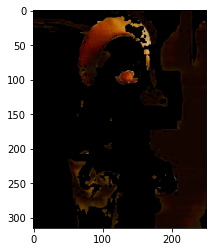

In [34]:
h_low = 0  #@param {type: "slider", min: 0, max: 255}
s_low = 0  #@param {type: "slider", min: 0, max: 255}
v_low = 0  #@param {type: "slider", min: 0, max: 255}

h_high = 18  #@param {type: "slider", min: 0, max: 255}
s_high = 255  #@param {type: "slider", min: 0, max: 255}
v_high = 255  #@param {type: "slider", min: 0, max: 255}


light_red = (h_low, s_low, v_low)
dark_red = (h_high, s_high, v_high)

girl_mask = cv.inRange(girl_hsv, light_red, dark_red)
girl_Reds = cv.bitwise_and(girl_original.copy(), girl_original.copy(), mask=girl_mask)
plt.imshow(girl_Reds);
plt.show()

In [35]:
girl_Reds.shape

(315, 251, 3)

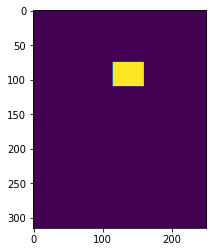

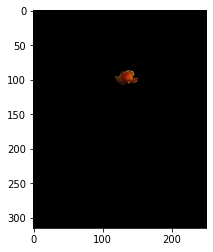

In [36]:
# Hacemos una mascara que contenga solo a la flor
flower_mask = np.zeros((girl_Reds.shape[0], girl_Reds.shape[1])).astype(np.uint8)
flower_mask[75:110, 115:160] = 1
plt.imshow(flower_mask)
plt.show()

girlRose_RGB = cv.bitwise_and(girl_Reds.copy(), girl_Reds.copy(), mask=flower_mask)
plt.imshow(girlRose_RGB)
plt.show()

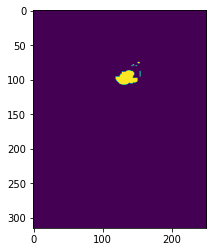

In [37]:
# Generamos una mascara con la rosa
rose_mask = cv.cvtColor(girlRose_RGB, cv.COLOR_RGB2GRAY)>0
plt.imshow(rose_mask)
plt.show()

Vemos un poco de ruido de alta frecuencia en la mascara

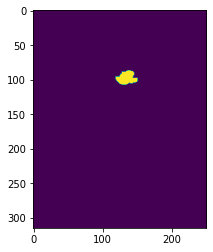

In [38]:
kernel = np.ones((3,3))
rose_mask_smooth = (cv.morphologyEx(rose_mask.astype(np.uint8), cv.MORPH_OPEN, kernel=kernel)>0).astype(np.uint8)
plt.imshow(rose_mask_smooth)
plt.show()

In [44]:
rose_mask_smooth.shape

(315, 251)

# Ya tenemos todo listo!

## Extraemos la rosa de nuevo para obtener mayor calidad

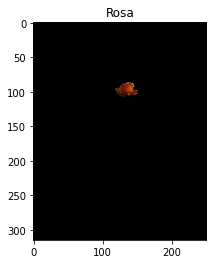

In [39]:
rose_RGB = cv.bitwise_and(girl_original.copy(), girl_original.copy(), mask=rose_mask_smooth)
plt.title("Rosa")
plt.imshow(rose_RGB);

## Convertimos a graysale y quitamos la rosa 
Tambien debemos realizar un reshape para que tenga 3 canales

In [97]:
girl_gray= cv.cvtColor(girl_original, cv.COLOR_RGB2GRAY) 
girl_gray_3channels = cv.cvtColor(girl_gray, cv.COLOR_GRAY2RGB)
girl_gray_3channels.shape

(315, 251, 3)

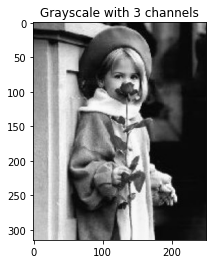

In [74]:
plt.title("Grayscale with 3 channels")
plt.imshow(girl_gray_3channels);

### Quitamos la Rosa

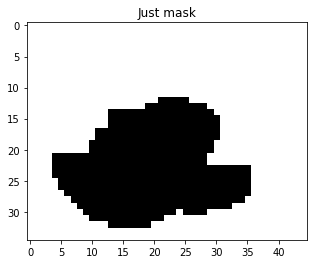

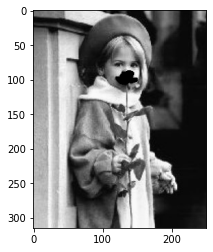

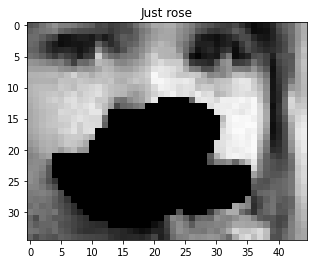

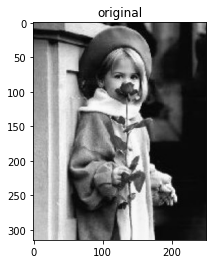

In [103]:
gray_girl_no_rose = cv.bitwise_and(girl_gray_3channels.copy(), girl_gray_3channels.copy(), mask=1-rose_mask_smooth)
plt.title("Just mask")
plt.imshow(1-rose_mask_smooth[75:110, 115:160], cmap='gray', interpolation=None)
plt.show()
plt.imshow(gray_girl_no_rose, cmap='gray', interpolation=None)
plt.show()
plt.title("Just rose")
plt.imshow(gray_girl_no_rose[75:110, 115:160], cmap='gray', interpolation=None)
plt.show()
plt.title("original")
plt.imshow(girl_gray_3channels)
plt.show()

Ahora sumamos la rosa

In [104]:
result = cv.add(gray_girl_no_rose, rose_RGB)

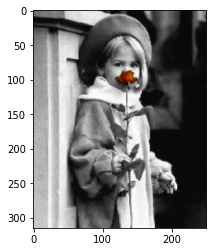

In [106]:
plt.imshow(result);